In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'

# Import Cytokine Data and Liver Redox and Flux Data

In [3]:
liverflux = pd.read_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Liver_TissueTracing_calculated.csv', header=16)
redox_ratios = pd.read_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/tissue_ratios.csv')
cytokines = pd.read_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/cytokines/sepsis_cytokines.csv')


In [113]:
cytokines

,Sample,Mouse,Condition,Eotaxin,G-CSF,GM-CSF,IFNγ,IL-1α,IL-1β,IL-2,...,LIX,MCP-1,M-CSF,MIG,MIP-1α,MIP-1β,MIP-2,RANTES,TNFα,VEGF
0,1,1,Sepsis,2469.69,52724.79,12.82,9.86,243.45,NaN,12.43,...,457.87,4864.78,29.17,1161.18,548.60,1170.41,182.56,1257.37,1545.35,0.51
1,3,3,Sepsis,82630.14,66834.69,27.44,8.56,314.71,50.15,7.42,...,536.02,5581.98,58.38,3231.61,1718.43,9317.27,31098.18,350.40,144.26,0.42
2,5,5,Sepsis,4710.54,62159.44,13.98,2.56,210.83,7.86,5.38,...,233.22,1249.38,24.63,2788.65,815.11,1580.71,861.41,213.60,85.10,NaN
3,8,9,Sepsis,NaN,68897.31,31.32,14.70,238.85,61.90,10.44,...,567.33,3231.29,69.47,4165.15,1915.25,8234.94,42437.70,79.14,191.52,0.60
4,10,11,Sepsis,2291.50,57431.00,16.10,4.69,252.59,7.09,2.31,...,296.66,6145.17,10.96,2511.32,751.63,2085.85,293.54,134.09,56.44,0.05
5,12,13,Sepsis,NaN,61266.09,31.94,11.61,270.65,27.02,13.43,...,522.75,5157.32,56.15,3726.97,2696.74,18256.87,8917.17,457.09,448.17,0.73
6,2,2,Sham,1983.46,1250.60,NaN,0.43,30.60,5.55,4.87,...,90.14,32.00,8.68,379.67,211.95,382.70,208.31,52.32,15.18,NaN
7,4,4,Sham,2700.18,9171.43,NaN,1.49,63.70,4.03,3.33,...,209.14,210.67,17.80,538.44,288.49,384.99,153.79,83.77,16.14,NaN
8,6,6,Sham,2466.18,12115.01,4.92,2.56,69.81,6.32,6.40,...,209.14,514.58,8.68,779.27,248.34,377.33,168.67,124.49,20.12,NaN
9,7,8,Sham,923.71,33164.76,16.10,16.48,172.12,10.98,7.92,...,221.42,441.11,38.21,1466.71,275.09,1034.68,180.17,47.36,48.49,NaN


In [4]:
#df.iloc[1:3, 0:3]
liverflux_filtered = pd.DataFrame()
samples = liverflux.iloc[0:14]['Unnamed: 3'].tolist()
gln_to_gsh = liverflux.iloc[0:14]['Glutathione (GSH)'].tolist()

liverflux_filtered['Condition'] = samples
liverflux_filtered['Mouse'] = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16]
liverflux_filtered['gln_to_gsh'] = gln_to_gsh

In [5]:
gln_to_gsh_flux = liverflux_filtered['gln_to_gsh'].tolist()

In [6]:
redox_ratios_ = redox_ratios[redox_ratios['Tissue'] == 'Liver']

In [7]:
#Prepare 
redox_ratios_filtered_long = pd.DataFrame()
c = redox_ratios_['Compound'].tolist()
v = redox_ratios_['variable'].tolist()
a = redox_ratios_['Abundance'].tolist()

redox_ratios_filtered_long['Mouse_Tissue'] = v
redox_ratios_filtered_long['Redox_Ratio'] = c
redox_ratios_filtered_long['Value'] = a

redox_ratios_filtered = redox_ratios_filtered_long.pivot(index='Mouse_Tissue', columns='Redox_Ratio', values='Value')

redox_ratios_filtered['Mouse'] = [10, 11, 12, 13, 14, 16, 1, 2, 3, 4, 5, 6, 8, 9]
redox_ratios_filtered_sorted = redox_ratios_filtered.sort_values('Mouse')

In [8]:
#Get redox values to list

GSH_GSSG = redox_ratios_filtered_sorted['2GSH_GSSG'].tolist()
ADP_ATP = (1/redox_ratios_filtered_sorted['ATP_ADP']).tolist()
AMP_ATP = (1/redox_ratios_filtered_sorted['ATP_AMP']).tolist()
Glu_Akg = (1/redox_ratios_filtered_sorted['Akg_Glu']).tolist()
Lac_Pyr = (1/redox_ratios_filtered_sorted['Pyr_Lac']).tolist()
NAD_NADH = redox_ratios_filtered_sorted['NAD_NADH'].tolist()

In [9]:
master_df = cytokines.sort_values('Mouse')

In [10]:
master_df['gln_to_gsh_flux'] = gln_to_gsh_flux
master_df['GSH_GSSG'] = GSH_GSSG
master_df['ADP_ATP'] = ADP_ATP
master_df['AMP_ATP'] = AMP_ATP
master_df['Glu_Akg'] = Glu_Akg
master_df['Lac_Pyr'] = Lac_Pyr
master_df['NAD_NADH'] = NAD_NADH
master_df

,Sample,Mouse,Condition,Eotaxin,G-CSF,GM-CSF,IFNγ,IL-1α,IL-1β,IL-2,...,RANTES,TNFα,VEGF,gln_to_gsh_flux,GSH_GSSG,ADP_ATP,AMP_ATP,Glu_Akg,Lac_Pyr,NAD_NADH
0,1,1,Sepsis,2469.69,52724.79,12.82,9.86,243.45,NaN,12.43,...,1257.37,1545.35,0.51,0.168740946,972.004513,6.511841,199.106046,17.047708,9.071151,60.788105
6,2,2,Sham,1983.46,1250.60,NaN,0.43,30.60,5.55,4.87,...,52.32,15.18,NaN,0.035228398,3267.273871,5.017674,22.070959,12.613781,11.941012,114.237916
1,3,3,Sepsis,82630.14,66834.69,27.44,8.56,314.71,50.15,7.42,...,350.40,144.26,0.42,0.139690235,2588.376238,5.402061,18.004354,8.895389,7.722183,38.403107
7,4,4,Sham,2700.18,9171.43,NaN,1.49,63.70,4.03,3.33,...,83.77,16.14,NaN,0.049513158,2537.269409,12.389890,101.426577,16.148328,17.797292,63.556777
2,5,5,Sepsis,4710.54,62159.44,13.98,2.56,210.83,7.86,5.38,...,213.60,85.10,NaN,0.181643341,3111.445282,9.036379,210.042303,17.299759,15.416197,33.471070
8,6,6,Sham,2466.18,12115.01,4.92,2.56,69.81,6.32,6.40,...,124.49,20.12,NaN,0.061701907,1715.227262,5.616413,27.974703,19.209219,13.744682,25.218138
9,7,8,Sham,923.71,33164.76,16.10,16.48,172.12,10.98,7.92,...,47.36,48.49,NaN,0.091255445,2825.409587,4.861634,19.667347,15.663862,16.048510,36.013071
3,8,9,Sepsis,NaN,68897.31,31.32,14.70,238.85,61.90,10.44,...,79.14,191.52,0.60,0.184738087,1465.015562,8.501073,46.332406,11.177454,5.497742,55.609367
10,9,10,Sham,2077.74,11251.64,NaN,16.71,98.83,1.08,24.08,...,161.11,12.50,NaN,0.044485514,3003.631031,4.824683,31.536619,14.477228,29.934048,60.954440
4,10,11,Sepsis,2291.50,57431.00,16.10,4.69,252.59,7.09,2.31,...,134.09,56.44,0.05,0.106831149,1927.183777,11.080869,260.053138,22.083776,7.252859,32.619374


In [11]:
master_df_sepsis_only = master_df[master_df['Condition'] == 'Sepsis']

# Make Correlation Matrices

In [12]:
master_for_corrmatrix = master_df.iloc[:, 3:]
sepsis_only_for_corrmatrix = master_df_sepsis_only.iloc[:, 3:]

In [13]:
master_corr = master_for_corrmatrix.corr()
sepsis_corr = sepsis_only_for_corrmatrix.corr()

<AxesSubplot:>

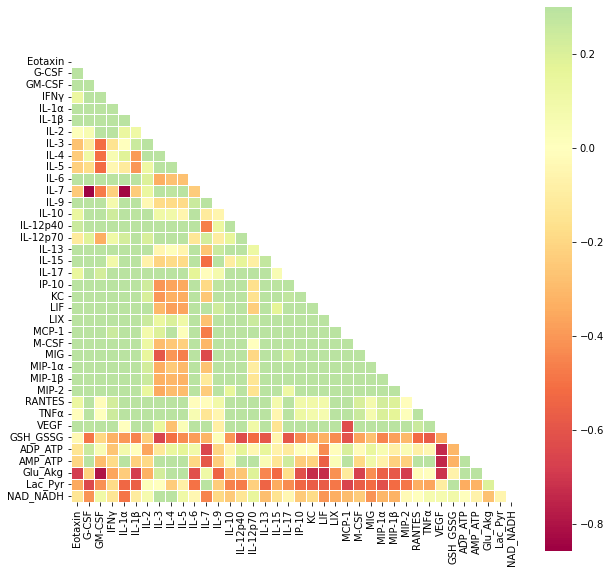

In [14]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

mask = np.triu(np.ones_like(master_corr, dtype=bool))
sns.heatmap(master_corr, mask=mask, cmap='Spectral', vmax=.3, center=0,
            square=True, linewidths=.5, ax=ax)

<AxesSubplot:>

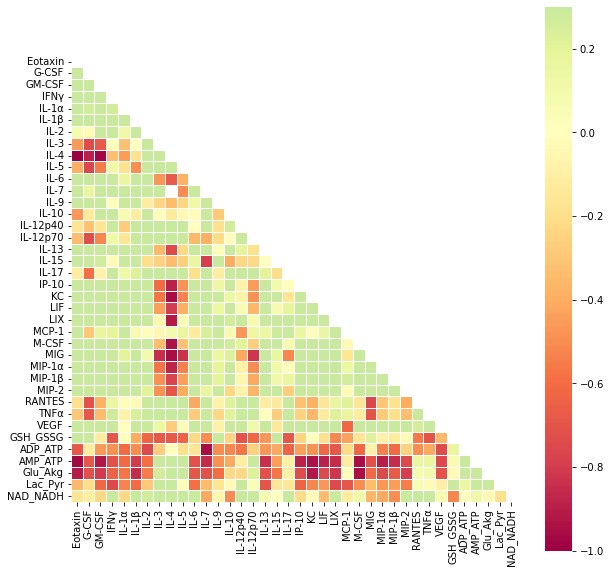

In [15]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

mask = np.triu(np.ones_like(sepsis_corr, dtype=bool))
sns.heatmap(sepsis_corr, mask=mask, cmap='Spectral', vmax=.3, center=0,
            square=True, linewidths=.5, ax=ax)

In [140]:
master_df.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/cytokines/cytokine_correlation_data.csv')

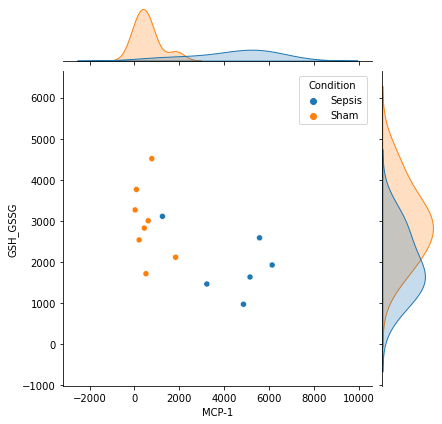

In [22]:
g = sns.jointplot(x='MCP-1', y='GSH_GSSG', data=master_df, hue = 'Condition',
kind="scatter")

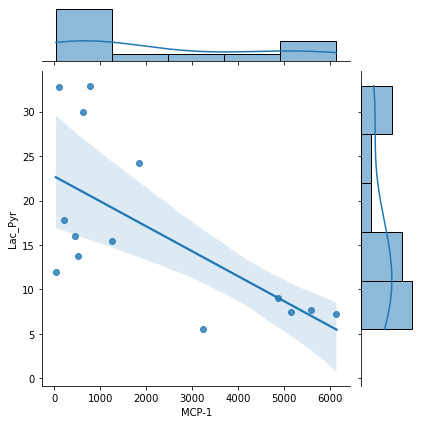

In [26]:
g = sns.jointplot(x='MCP-1', y='Lac_Pyr', data=master_df, hue = 'Condition',
kind="reg")

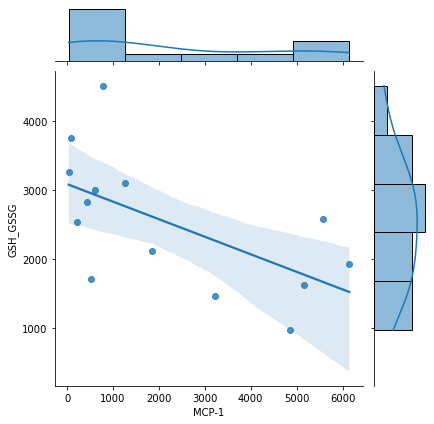

In [24]:
g = sns.jointplot(x='MCP-1', y='GSH_GSSG', data=master_df, #hue = 'Condition',
kind="reg")

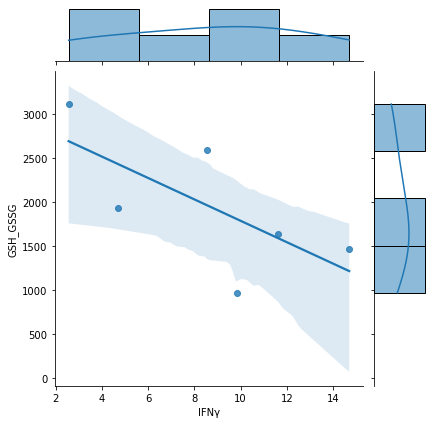

In [16]:
g = sns.jointplot(x='IFNγ', y='GSH_GSSG', data=master_df_sepsis_only, kind="reg")

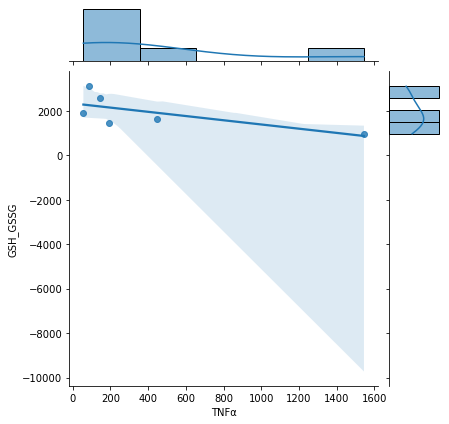

In [163]:
g = sns.jointplot(x='TNFα', y='GSH_GSSG', data=master_df_sepsis_only, kind="reg")